<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** José Fernando Flores.

**Fecha:** 27 de febrero del 2020.

**Expediente** : 714575.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10


## Tarea 6
> Usando notebook de jupyter resolver ejercicios de Distribución de Probabilidad.

### Ejercicio 1: 
> Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

In [521]:
# Código de solución
# Importar librerías
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

In [490]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [491]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'= True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()

In [504]:
# Función que calcula DP
def P_dist_Poisson(k,L):
    Pr = np.zeros(k)
    Pr[0] = np.exp(-L) 
    def pr(i):
        nonlocal Pr
        Pr[i+1] = (L/(i+1))*Pr[i]
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

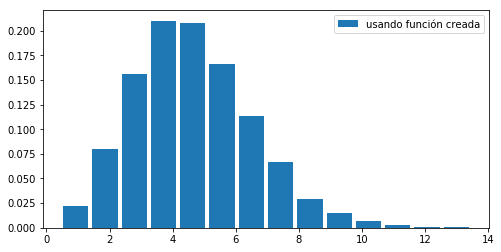

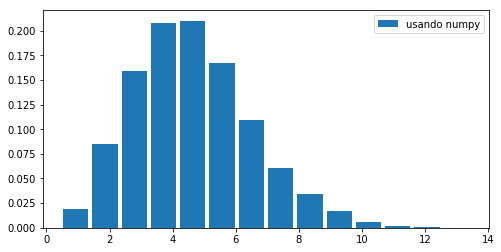

In [507]:
k = 10000; L = 4; N = 10**4

p_acum = P_dist_Poisson(k,L)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_poisson = Gen_distr_discreta(u,p_acum)

plot_histogram_discrete(d_poisson,'usando función creada')

# Usando numpy
d_poisson_numpy = np.random.poisson(L,k)
plot_histogram_discrete(d_poisson_numpy,'usando numpy')
plt.show()

### Ejercicio 2:
> Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
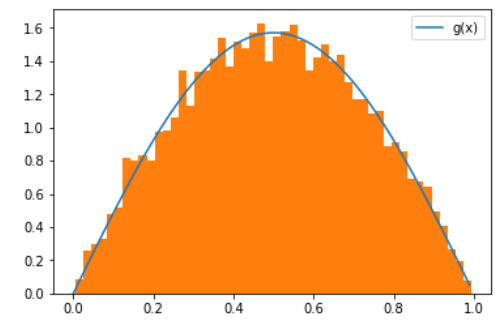

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
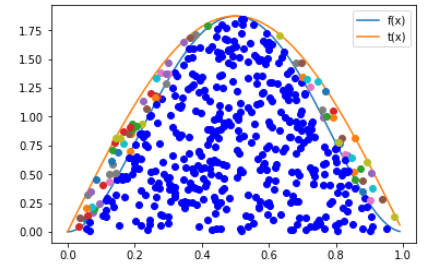

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

### Punto 1
> Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

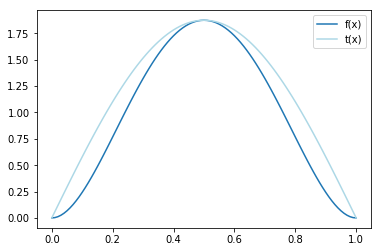

In [494]:
# Función objetivo 
#1
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función constante

x = np.arange(0,1.01,0.01)  # Rango donde se graficará las funciones
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)', color='lightblue')
plt.legend()

### Punto 2
> Encontrar la función de densidad $g(x)$.

${\mathrm{Partiendo\ de\ que,}}$ 
$$t(x) = 1.87 \ sin(\pi x)$$ 

$$c = \int_{0}^{1}t(x) \ dx$$ \
${\mathrm{Podemos\ concluir\ lo \ siguiente,}}$ 
 
$$g(x) = \frac{t(x)}{c} = \frac{\pi \ sin (\pi x)}{2}$$ 

### Punto 3
> Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución 𝑔(𝑥).

${\mathrm{A\ partir\ de}}$
 
$$g(x) = \frac{\pi \ sin (\pi x)}{2}$$ 

${\mathrm{Llegamos\ a}}$


$$G(x) = \frac{1 - cos(\pi x)}{2}$$ 

${\mathrm{La\ cual\ tiene\ una\ inversa\ con\ la\ que\ generaremos\ variables\ aleatorias\ que\ sigan\ la\ distribución\ g(x)}}$

$$G^{-1}(u) = \frac{arccos(1 - 2u)}{\pi}$$
    

### Punto 4
> generar 10000 puntos aleatorios que sigan la distribución 𝑔(𝑥) y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.

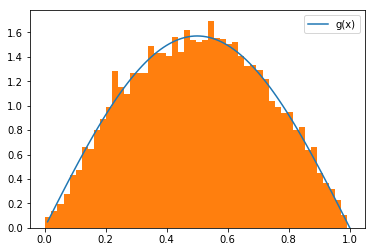

In [519]:
#4
w = np.arange(0.01,1.01,0.01)
def g(x):
    return (np.pi*0.5)*np.sin(np.pi*x)

N=10**4
u = np.random.rand(N)
ginv = np.arccos((1-2*u))/np.pi

plt.plot(w,g(w), label='g(x)')
plt.legend()
plt.hist(ginv, 50,density=True)
plt.show()

### Punto 5,6
> Se alteró la función Acep_rechazo para que también retorne el porcentaje de puntos de aceptación.

In [496]:
# Código Solución

# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    a = [i for i in range(N) if condition[i]]
    print('El porcentaje de puntos de aceptación es de:',len(a)/N)

El máximo de f es: [1.875]


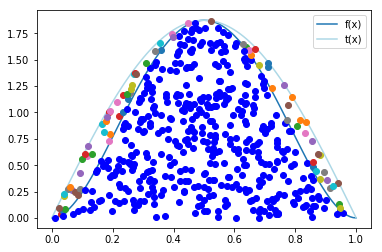

El porcentaje de puntos de aceptación es de: 0.846


In [497]:
#5
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función senoidal

x = np.arange(0,1.01,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)', color='lightblue')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
u = np.random.rand(N)
R1 = np.arccos((1-2*u))/np.pi

Acep_rechazo(R2,R1,f,t)

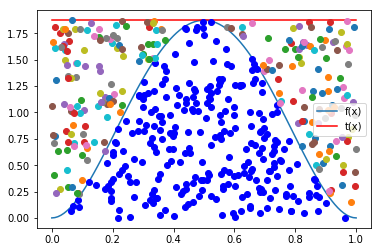

El porcentaje de puntos de aceptación es de: 0.534


In [498]:
#6
# Acep rechazo con t constante
R1c = np.random.rand(N)
tc = lambda x: max_f*np.ones(len(x)) # función constante

plt.plot(x,f(x),label='f(x)')
plt.plot(x,tc(x),label='t(x)', color='red')
plt.legend()

Acep_rechazo(R2,R1c,f,tc)

### <font color= blue> Punto 7</font>
> Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [499]:
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    
    a = [R1[i] if condition[i] else 0 for i in range(len(R1))]
    c = list(filter(lambda x: 0 < x, a ))
    plt.hist(c,30,density=True)
    return 

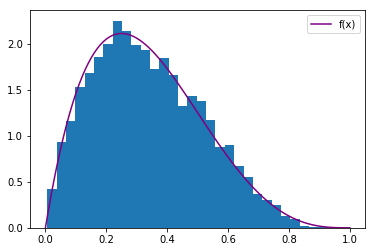

In [500]:
# Definir la función fx
fx = lambda x: 20*x*(1-x)**3

# Obtener el máximo de la función fx
max_fx = fx(optimize.fmin(lambda x:-fx(x),0,disp=False))

# Definir la función t(x) como una constante
t1 = lambda x: max_fx*np.ones(len(x))
N = 10000
R2 = np.random.rand(N)
R1 = np.random.rand(N)
             
plt.plot(v,fx(v), color = 'purple', label='f(x)')
plt.legend()
Acep_rechazo2(R2,R1,fx,t1)
plt.show()

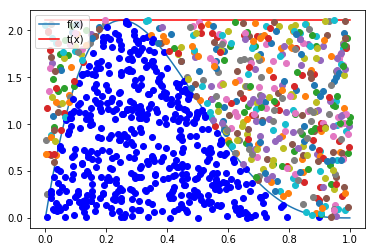

El porcentaje de puntos de aceptación es de: 0.486


In [501]:
# Acep rechazo con t constante
N = 1000
r2 = np.random.rand(N)
r1 = np.random.rand(N)

plt.plot(x,fx(x),label='f(x)')
plt.plot(x,t1(x),label='t(x)', color='red')
plt.legend()

Acep_rechazo(r2,r1,fx,t1)